In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt 
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
#from utils import plot_decision

In [2]:
df = pd.read_csv('car_evaluation.csv', header=None)
df.head(5)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']

In [4]:
df.head(5)

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.describe()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1728 non-null   object
 1   Maint       1728 non-null   object
 2   Doors       1728 non-null   object
 3   Persons     1728 non-null   object
 4   LugBoot     1728 non-null   object
 5   Safety      1728 non-null   object
 6   Evaluation  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df['Buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [8]:
# Import label encoder
from sklearn import preprocessing

# Create a label encoder object
label_encoder = preprocessing.LabelEncoder()

# Encode labels in the 'Country' column
df['Buying'] = label_encoder.fit_transform(df['Buying'])

In [9]:
df['Buying'].unique()

array([3, 0, 2, 1])

In [10]:
df['Maint'] = label_encoder.fit_transform(df['Maint'])
df['LugBoot'] = label_encoder.fit_transform(df['LugBoot'])
df['Safety'] = label_encoder.fit_transform(df['Safety'])

In [11]:
df.head()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,3,3,2,2,2,1,unacc
1,3,3,2,2,2,2,unacc
2,3,3,2,2,2,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc


In [12]:
df.LugBoot.unique()

array([2, 1, 0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1728 non-null   int32 
 1   Maint       1728 non-null   int32 
 2   Doors       1728 non-null   object
 3   Persons     1728 non-null   object
 4   LugBoot     1728 non-null   int32 
 5   Safety      1728 non-null   int32 
 6   Evaluation  1728 non-null   object
dtypes: int32(4), object(3)
memory usage: 67.6+ KB


In [14]:
df.Doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [15]:
df.Persons.unique()

array(['2', '4', 'more'], dtype=object)

In [16]:
df.Persons.replace('more', '6', inplace=True)

In [17]:
df.Persons.unique()

array(['2', '4', '6'], dtype=object)

In [18]:
df.Persons.unique()

array(['2', '4', '6'], dtype=object)

In [19]:
df.Persons=df.Persons.astype('int32')

In [20]:
df.Persons.unique()

array([2, 4, 6])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1728 non-null   int32 
 1   Maint       1728 non-null   int32 
 2   Doors       1728 non-null   object
 3   Persons     1728 non-null   int32 
 4   LugBoot     1728 non-null   int32 
 5   Safety      1728 non-null   int32 
 6   Evaluation  1728 non-null   object
dtypes: int32(5), object(2)
memory usage: 60.9+ KB


In [22]:
df.Doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [23]:
df.Doors.replace('5more', '5',inplace  = True)

In [24]:
df.Doors=df.Doors.astype('int32')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1728 non-null   int32 
 1   Maint       1728 non-null   int32 
 2   Doors       1728 non-null   int32 
 3   Persons     1728 non-null   int32 
 4   LugBoot     1728 non-null   int32 
 5   Safety      1728 non-null   int32 
 6   Evaluation  1728 non-null   object
dtypes: int32(6), object(1)
memory usage: 54.1+ KB


In [27]:
df.corr()

,Buying,Maint,Doors,Persons,LugBoot,Safety
Buying,1.000000e+00,-3.436808e-16,1.345683e-15,1.295719e-16,-1.691262e-16,-2.439415e-16
Maint,-3.436808e-16,1.000000e+00,4.343748e-16,1.478007e-18,-1.549092e-16,-1.404810e-16
Doors,1.345683e-15,4.343748e-16,1.000000e+00,-4.617011e-17,-5.489739e-18,1.088094e-16
Persons,1.295719e-16,1.478007e-18,-4.617011e-17,1.000000e+00,2.698459e-18,3.450172e-17
LugBoot,-1.691262e-16,-1.549092e-16,-5.489739e-18,2.698459e-18,1.000000e+00,-1.541976e-17
Safety,-2.439415e-16,-1.404810e-16,1.088094e-16,3.450172e-17,-1.541976e-17,1.000000e+00


<AxesSubplot:>

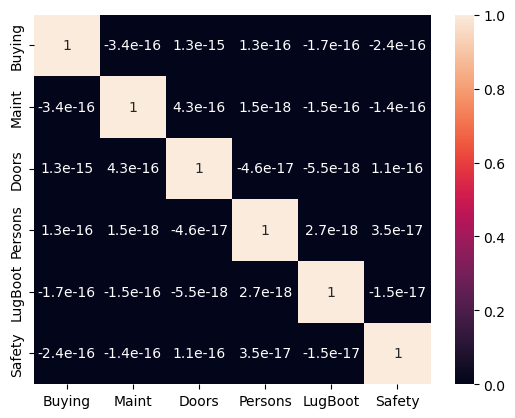

In [28]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

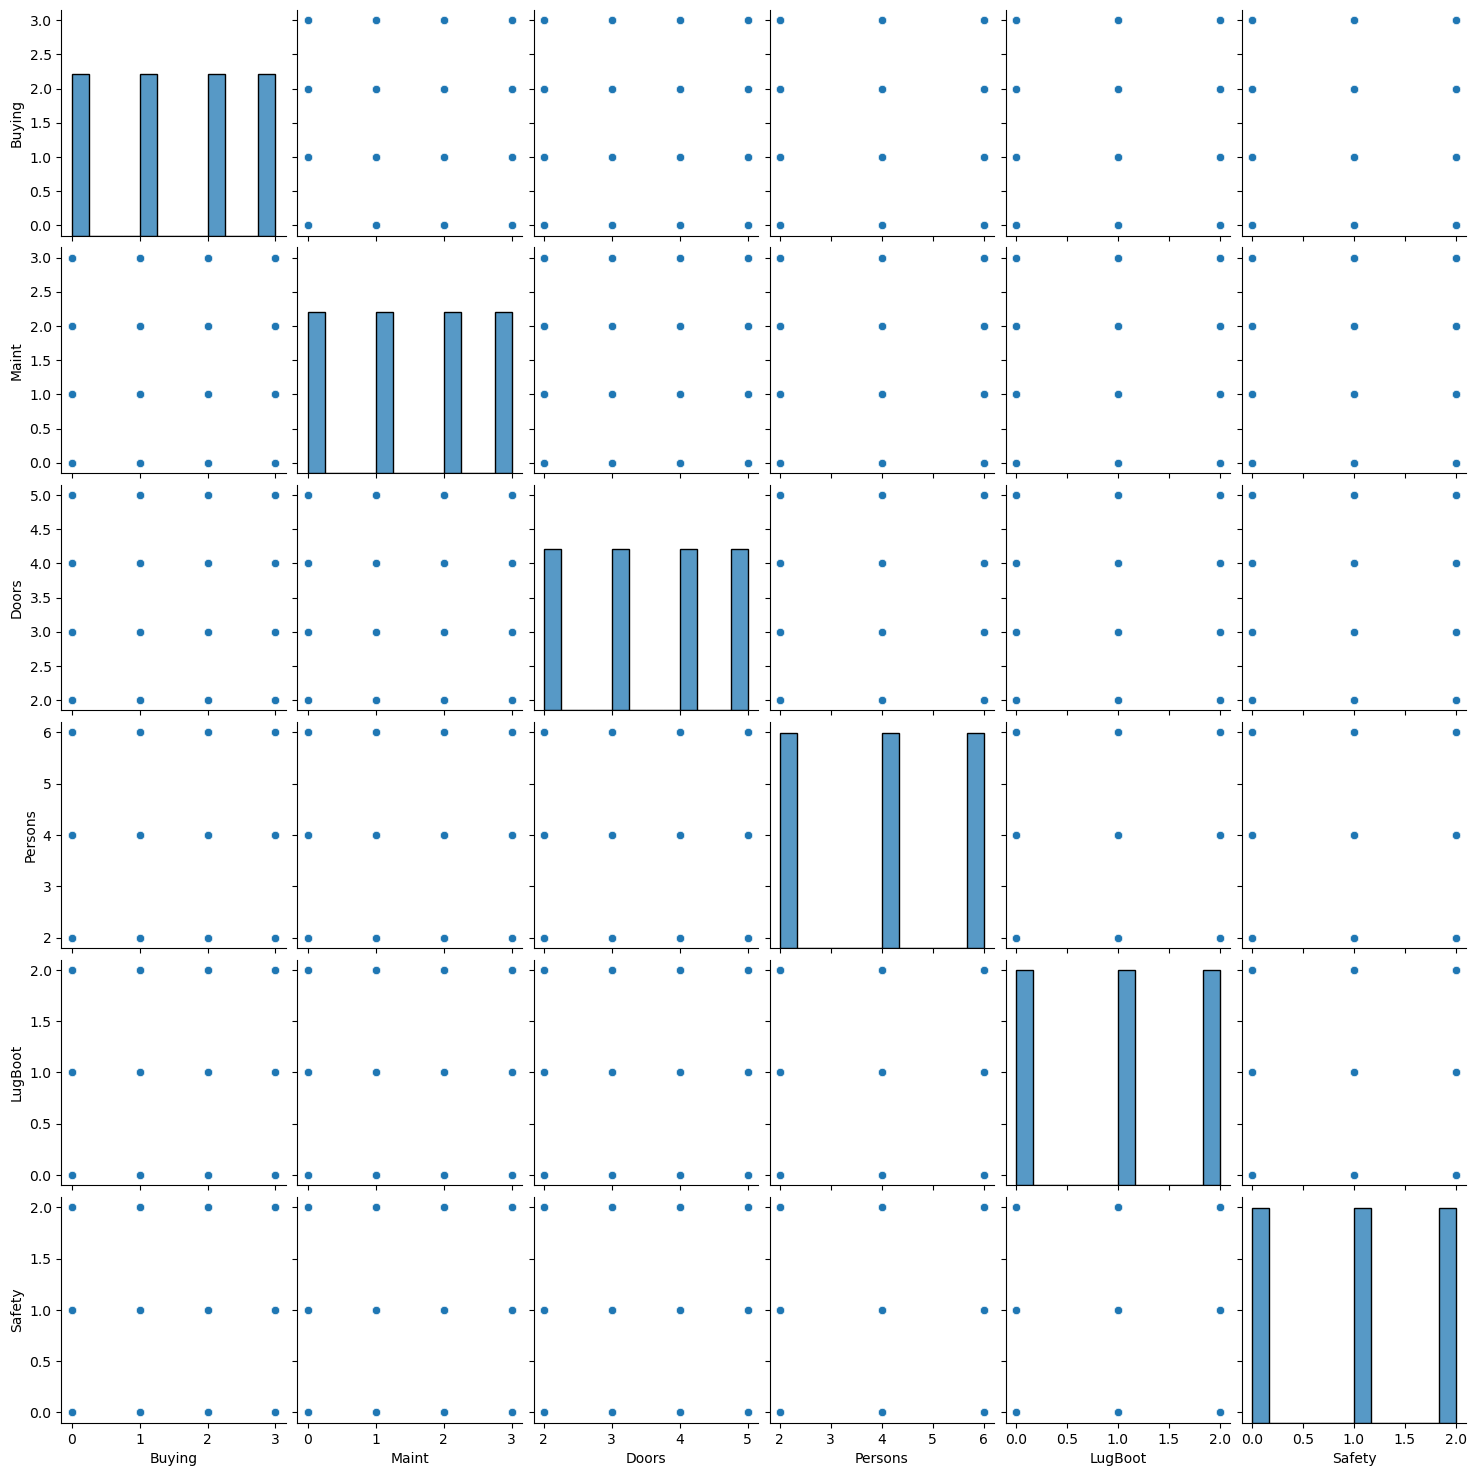

In [29]:
sns.pairplot(df)

In [30]:
X = df.drop('Evaluation', axis=1)
y = df['Evaluation']

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
         0.        ],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
         1.22474487],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
        -1.22474487],
       ...,
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
         0.        ],
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
         1.22474487],
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
        -1.22474487]])

In [32]:
X.shape

(1728, 6)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(0.60)
X_pca = pca.fit_transform(X)
X_pca.shape

(1728, 3)

In [38]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6560693641618497

In [40]:
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.6560693641618497

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca5 = pca.fit_transform(X)
X_pca5.shape

(1728, 5)

In [43]:
from sklearn.model_selection import train_test_split
X_train_pca5, X_test_pca5, y_train, y_test = train_test_split(X_pca5, y, test_size=0.2, random_state=30)

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca5, y_train)
model.score(X_test_pca5, y_test)

0.6473988439306358